In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Inversion Technique for Sampling Continuous Random Variables

### Theorem .1
Suppose that $ X $ is a continuous random variable with cumulative distribution function (cdf) $ F_X(x) $ and quantile function $ F_X^{-1}(p) $. Let $ U \sim U(0,1) $, independently of $ X $, and define $ R = F_X^{-1}(U) $. Then $ R $ has the same distribution as $ X $.

### Proof of Theorem .1
Observe that $ U $ has cdf 

$$
F_U(u) = u, \quad 0 < u < 1.
$$

This implies that $ R $ has cdf 

$$
F_R(r) = P(R \leq r) = P(F_X(F_X^{-1}(U)) \leq F_X(r)) = P(U \leq F_X(r)) = F_X(r).
$$

Thus, $ R $ has the same cdf as $ X $ and therefore the same distribution.

## Note
A complication with the inversion technique may arise if there is difficulty deriving the quantile function $ F_X^{-1}(p) $. In that case, since the task is fundamentally to solve $ F_X(x) = u $ for $ x $, it may be useful to employ the Newton-Raphson algorithm to the problem of solving the equation 

$$
g(x) = 0, \quad g(x) = F_X(x) - u.
$$

## Exercise.10: Practice at the Inversion Technique

### Part (a)
Using $ u = 0.371 $ as a value from the standard uniform distribution, obtain a value from the standard exponential distribution.

Let $ X \sim G(1,1) $ with density function 

$$
f(x) = e^{-x}, \quad x > 0,
$$

and cdf 

$$
F(x) = \int e^{-t} dt = 1 - e^{-x}, \quad x > 0.
$$

The quantile function is the solution of 

$$
1 - e^{-x} = p,
$$

namely 

$$
F^{-1}(p) = -\log(1 - p).
$$

So a value from the standard exponential distribution is computed as 

$$
x = F^{-1}(u) = -\log(1 - 0.371) = 0.463624.
$$

Taking $ J = 1000 $, generate $ u_1, \ldots, u_J \sim \text{iid} \ U(0,1) $ in R using the `runif()` function, and calculate 

$$
x_j = -\log(1 - u_j) \text{ for each } j = 1, \ldots, J.
$$

This results in the required sample $ x_1, \ldots, x_J \sim \text{iid} \ G(1,1) $. Using this sample, the Monte Carlo estimate of $ \mu = E[X] $ is 

$$
0.9967,
$$ 

and a 95% CI for $ \mu $ is 

$$
(0.9322, 1.0613).
$$ 

We see that the CI contains the true value being estimated (i.e., 1).

### Part (b)
Using $ u = 0.371 $ as a value from the standard uniform distribution, obtain a value from the gamma distribution with mean and variance both equal to 2.

Here, $ X \sim G(2,1) $ with mean $ \frac{2}{1} = 2 $ and variance $ \frac{2}{12} = 2 $. The pdf is 

$$
f(x) = x e^{-x},
$$ 

and the cdf is given by 

$$
F(x) = \int t e^{-t} dt.
$$

To compute $ F(x) $:

$$
F(x) = -xe^{-x} + \int e^{-t} dt \Big|_{0}^{x} = -xe^{-x} - e^{-x} + 1 = 1 - (x + 1)e^{-x}.
$$

The quantile function of $ X $, $ F^{-1}(p) $, does not have a closed form expression, as it is the root of the function 

$$
g(x) = F(x) - p = 1 - (x + 1)e^{-x} - p,
$$ 

i.e., the solution of $ g(x) = 0 $.


## Newton-Raphson Algorithm for Finding Roots

For any $ p $, we can obtain the root using the Newton-Raphson algorithm by iterating $ g(x_j) $, where 

$$
g'(x) = F'(x) - 0 = f(x) = x e^{-x}.
$$

The update rule for the Newton-Raphson iteration is given by 

$$
x_{j+1} = x_j - \frac{g(x_j)}{g'(x_j)} = x_j - \frac{1 - (x_j + 1)e^{-x_j} - p}{f(x_j)}.
$$

With $ p = u = 0.371 $ and starting arbitrarily at $ x_0 = 1 $, we obtain the sequence:

- $ x_1 = 1.0000 $
- $ x_2 = 1.2902 $
- $ x_3 = 1.2939 $
- $ x_4 = 1.2939 $
- $ x_5 = 1.2939 $
- $ x_6 = 1.2939 $
- $ x_7 = 1.2939 $

Thus, we return $ 1.2939 $ as a value from the $ G(2,1) $ distribution.

### Verification
To verify, we use the `pgamma()` function in R to confirm that 

$$
F_X(1.2939) = 0.371.
$$

This is computed as follows:




Estimated Mean: 1.9208
95% Confidence Interval: (1.838053737776465, 2.0035498240487644)


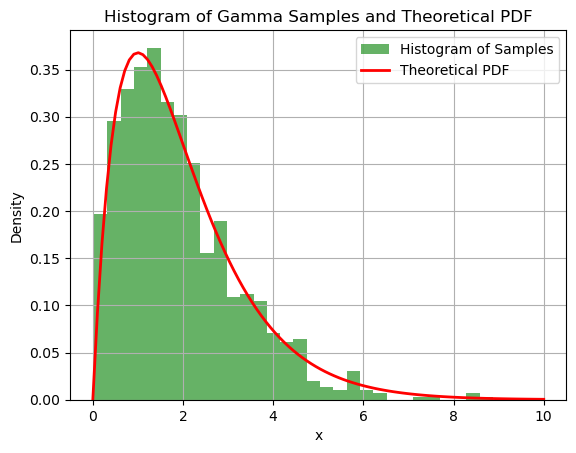

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

def gamma_cdf(x, a, scale):
    """Cumulative distribution function for the Gamma distribution."""
    return gamma.cdf(x, a, scale=scale)

def gamma_pdf(x, a, scale):
    """Probability density function for the Gamma distribution."""
    return gamma.pdf(x, a, scale=scale)

def g(x, u, a, scale):
    """Function for Newton-Raphson: g(x) = F(x) - u."""
    return gamma_cdf(x, a, scale) - u

def g_prime(x, a, scale):
    """Derivative of g(x) for Newton-Raphson: g'(x) = f(x)."""
    return gamma_pdf(x, a, scale)

def newton_raphson(u, a, scale, x0, max_iter=100, tol=1e-5):
    """Find root of g(x) = 0 using the Newton-Raphson method."""
    x = x0
    for _ in range(max_iter):
        gx = g(x, u, a, scale)
        gpx = g_prime(x, a, scale)
        if gpx == 0:  # Avoid division by zero
            break
        x_new = x - gx / gpx
        if abs(x_new - x) < tol:  # Convergence check
            break
        x = x_new
    return x

def generate_gamma_samples(J, a, scale):
    """Generate J samples from the Gamma distribution using the inversion method."""
    samples = []
    for _ in range(J):
        u = random.uniform(0, 1)  # Generate u ~ U(0, 1)
        sample = newton_raphson(u, a, scale, x0=1)  # Start at x0=1
        samples.append(sample)
    return samples

# Parameters for Gamma distribution
a = 2  # shape parameter
scale = 1  # scale parameter

# Generate samples
J = 1000
gamma_samples = generate_gamma_samples(J, a, scale)

# Estimate mean and confidence interval
mean_estimate = np.mean(gamma_samples)
std_dev = np.std(gamma_samples)
conf_interval = (mean_estimate - 1.96 * (std_dev / np.sqrt(J)), mean_estimate + 1.96 * (std_dev / np.sqrt(J)))

# Results
print(f"Estimated Mean: {mean_estimate:.4f}")
print(f"95% Confidence Interval: {conf_interval}")

# Plotting the histogram of samples
plt.hist(gamma_samples, bins=30, density=True, alpha=0.6, color='g', label='Histogram of Samples')

# Plotting the theoretical PDF
x = np.linspace(0, 10, 100)
plt.plot(x, gamma_pdf(x, a, scale), 'r-', lw=2, label='Theoretical PDF')

plt.title('Histogram of Gamma Samples and Theoretical PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


## Sampling from the Double Exponential Distribution

To sample a value $ x $ from the double exponential distribution with the probability density function (PDF) 

$$
f(x) = \frac{1}{2} e^{-|x|}, \quad x \in \mathbb{R},
$$

we can express $ x $ as a composition of two independent random variables that can be easily sampled.

### Method

Let $ R $ and $ Y $ be independent random variables such that:

- $ R \sim \text{Bernoulli}(0.5) $ 
- $ Y \sim G(1, 1) $ (standard exponential distribution)

We can define a new random variable:

$$
U = (2R - 1)Y.
$$

This composition gives us a random variable $ U $ that has the same distribution as $ x $.

### Explanation

- The variable $ R $ can take values $ 0 $ or $ 1 $ with equal probability (0.5 each).
- Thus, $ 2R - 1 $ will take values $ -1 $ or $ +1 $ with equal probability.
- This means there is a 50% chance that $ U $ will take the positive value from the exponential distribution $ G(1, 1) $ and a 50% chance that it will take the negative value.

### Formal Proof

To verify the distribution of $ U $, we can calculate the cumulative distribution function (CDF):

$$
F_U(u) = P(U \leq u) = P((2R - 1)Y \leq u) 
$$

This can be computed as:

$$
F_U(u) = E[P((2R - 1)Y \leq u | R)] = P(R = 0) P((2R - 1)Y \leq u | R = 0) + P(R = 1) P((2R - 1)Y \leq u | R = 1)
$$

Substituting the probabilities gives us:

1. For $ R = 0 $:

$$
P((2R - 1)Y \leq u | R = 0) = P(-Y \leq u) = P(Y \geq -u) = \frac{1}{2} e^{-(-u)} = \frac{1}{2} e^{u} \quad (u < 0).
$$

2. For $ R = 1 $:

$$
P((2R - 1)Y \leq u | R = 1) = P(Y \leq u) = \frac{1}{2}(1 - e^{-u}) \quad (u \geq 0).
$$

Combining these results, we get:

- For $ u < 0 $:

$$
F_U(u) = \frac{1}{2} e^{u}.
$$

- For $ u \geq 0 $:

$$
F_U(u) = \frac{1}{2}(1) + \frac{1}{2}(1 - e^{-u}) = 1 - \frac{1}{2} e^{-u}.
$$

Taking the derivative of $ F_U(u) $, we find the PDF $ f_U(u) $:

$$
f_U(u) = F'_U(u) = \begin{cases} 
\frac{1}{2} e^{u} & u < 0 \\ 
\frac{1}{2} e^{-u} & u \geq 0 
\end{cases}.
$$

Thus, the PDF can be written as:

$$
f_U(u) = \frac{1}{2} e^{-|u|}, \quad -\infty < u < \infty,
$$

which is the same as the PDF of $ x $.


In [2]:
import random
import math

def sample_double_exponential():
    # Sample R from Bernoulli(0.5)
    R = random.choice([0, 1])
    # Sample Y from Gamma(1, 1) which is the same as Exponential(1)
    Y = -math.log(random.random())  # Equivalent to sampling from Exp(1)
    
    # Calculate U
    U = (2 * R - 1) * Y
    return U

# Generate a large sample
J = 1000
samples = [sample_double_exponential() for _ in range(J)]

# Estimate the mean and 95% confidence interval
mean_estimate = sum(samples) / J
std_dev = (sum((x - mean_estimate) ** 2 for x in samples) / (J - 1)) ** 0.5
conf_interval = (mean_estimate - 1.96 * std_dev / (J ** 0.5), mean_estimate + 1.96 * std_dev / (J ** 0.5))

# Print results
print(f"Estimated Mean: {mean_estimate}")
print(f"95% Confidence Interval: {conf_interval}")


Estimated Mean: 0.023337325344472356
95% Confidence Interval: (-0.061124515738445725, 0.10779916642739044)


Estimated Mean: 0.01855915780453298
95% Confidence Interval: (-0.06779850928050546, 0.10491682488957141)


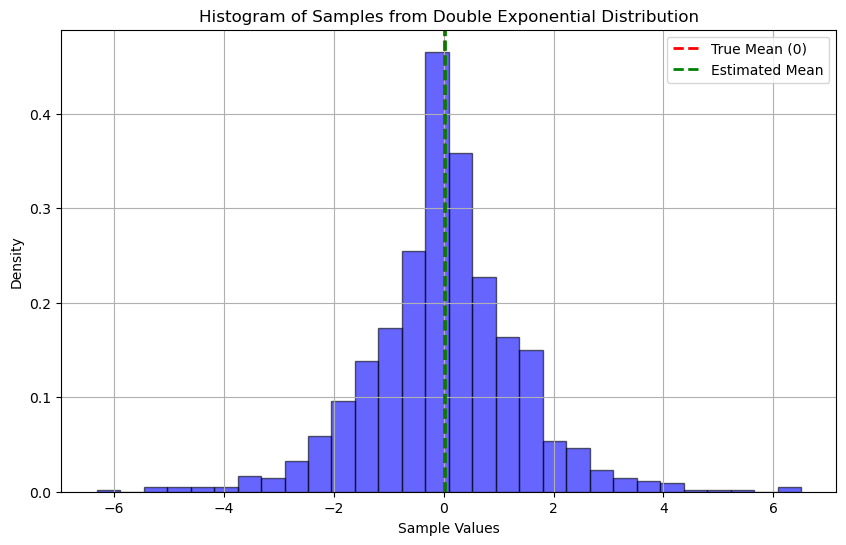

In [3]:
import random
import math
import matplotlib.pyplot as plt

def sample_double_exponential():
    # Sample R from Bernoulli(0.5)
    R = random.choice([0, 1])
    # Sample Y from Gamma(1, 1) which is the same as Exponential(1)
    Y = -math.log(random.random())  # Equivalent to sampling from Exp(1)
    
    # Calculate U
    U = (2 * R - 1) * Y
    return U

# Generate a large sample
J = 1000
samples = [sample_double_exponential() for _ in range(J)]

# Estimate the mean and 95% confidence interval
mean_estimate = sum(samples) / J
std_dev = (sum((x - mean_estimate) ** 2 for x in samples) / (J - 1)) ** 0.5
conf_interval = (mean_estimate - 1.96 * std_dev / (J ** 0.5), mean_estimate + 1.96 * std_dev / (J ** 0.5))

# Print results
print(f"Estimated Mean: {mean_estimate}")
print(f"95% Confidence Interval: {conf_interval}")

# Plotting the histogram of the samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Plotting the true mean and estimated mean
plt.axvline(x=0, color='red', linestyle='dashed', linewidth=2, label='True Mean (0)')
plt.axvline(x=mean_estimate, color='green', linestyle='dashed', linewidth=2, label='Estimated Mean')

# Adding titles and labels
plt.title('Histogram of Samples from Double Exponential Distribution')
plt.xlabel('Sample Values')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


## Exercise.12: Sampling from a Triangular Distribution

Suppose we want to sample a random variable $ x $ such that its probability density function (pdf) is defined as follows:

$$
f(x) = 
\begin{cases} 
2x & \text{for } 0 < x < 1 \\ 
2(2 - x) & \text{for } 1 < x < 2 
\end{cases}
$$

## Solution

We can obtain $ x $ by combining two random variables as follows:

1. **Method 1**: 
   - Sample the two random variables:
     - $ r \sim \text{Bernoulli}(0.5) $
     - $ y \sim \text{Beta}(2, 1) $
   - Then calculate $ x $ using the formula:
   $$
   x = ry + (1 - r)(2 - y)
   $$
   In this method, there is a 50% chance that $ x $ will equal $ y $, whose pdf is $ f(y) = 2y $ for $ 0 < y < 1 $. There is also a 50% chance that $ x $ will equal $ z = 2 - y $, whose pdf is $ f(z) = 2(2 - z) $ for $ 1 < z < 2 $.

2. **Method 2**: 
   - Sample two independent uniform random variables:
     - $ u_1, u_2 \sim \text{iid } U(0,1) $
   - Calculate $ x $ using the formula:
   $$
   x = u_1 + u_2
   $$
   It can be shown that a value of $ x $ formed in this way has the triangular pdf in question.

In both methods, we can effectively sample from the desired triangular distribution.


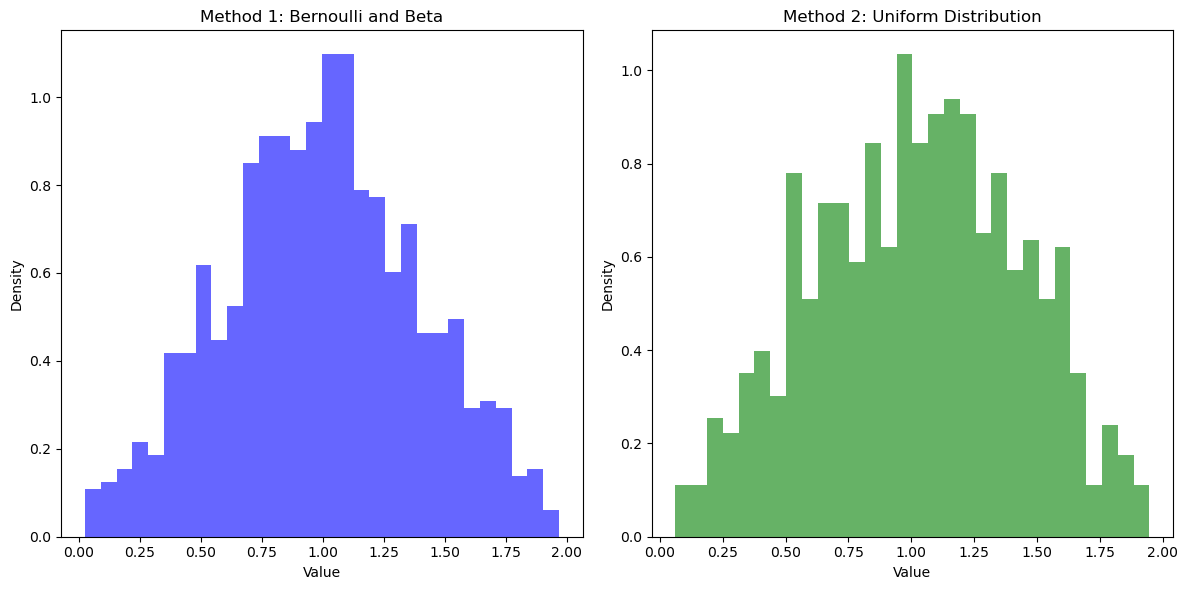

In [4]:
import random
import matplotlib.pyplot as plt

# Method 1: Using Bernoulli and Beta distributions
def sample_triangular_method1():
    r = random.choices([0, 1], weights=[0.5, 0.5])[0]  # Bernoulli(0.5)
    y = random.betavariate(2, 1)  # Beta(2, 1)
    x = r * y + (1 - r) * (2 - y)
    return x

# Method 2: Using Uniform distributions
def sample_triangular_method2():
    u1 = random.uniform(0, 1)  # Uniform(0, 1)
    u2 = random.uniform(0, 1)  # Uniform(0, 1)
    x = u1 + u2  # Triangle distribution
    return x

# Generate samples
num_samples = 1000
samples_method1 = [sample_triangular_method1() for _ in range(num_samples)]
samples_method2 = [sample_triangular_method2() for _ in range(num_samples)]

# Plotting the histograms for both methods
plt.figure(figsize=(12, 6))

# Histogram for Method 1
plt.subplot(1, 2, 1)
plt.hist(samples_method1, bins=30, density=True, alpha=0.6, color='blue')
plt.title('Method 1: Bernoulli and Beta')
plt.xlabel('Value')
plt.ylabel('Density')

# Histogram for Method 2
plt.subplot(1, 2, 2)
plt.hist(samples_method2, bins=30, density=True, alpha=0.6, color='green')
plt.title('Method 2: Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


## 12 Rejection Sampling

Some distributions are difficult to sample from using any of the already mentioned methods. For example, when applying the inversion technique, solving the equation $$ F(x) = u $$ may be problematic even with the aid of the Newton-Raphson algorithm (e.g., due to instability unless starting at very close to the solution). In such cases, one convenient and easy way to obtain a value from the distribution of interest may be via rejection sampling (also known as the rejection method or the acceptance-rejection method).

This method works as follows. Suppose we want to generate a random number from a target distribution with density $$ f(x) $$. This target distribution may be continuous or discrete. We must first decide on a suitable envelope distribution with envelope density $$ h(x) $$. (These are also called the majorising distribution and majorising density.) Ideally, the chosen density $$ h(x) $$ is similar in shape to $$ f(x) $$ and relatively easy to sample from.

We next define the following quantities:
$$
c = \max \left( \frac{f(x)}{h(x)} \right) 
$$
$$
p(x) = \frac{f(x)}{c h(x)}
$$

The idea here is that $$ f(x) $$ lies entirely beneath $$ c h(x) $$ except that it touches $$ c h(x) $$ at maybe only one point. Then $$ p(x) $$, which is called the acceptance probability, appropriately lies between 0 and 1 (inclusive).

The rejection algorithm is as follows:
1. Sample a proposed value (or candidate) $$ x' \sim h(x) $$.
2. Calculate the acceptance probability 
   $$
   p = p(x') = \frac{f(x')}{c h(x')}
   $$
3. Generate a standard uniform value $$ u \sim U(0,1) $$.
4. Decide whether to accept or reject the candidate, as follows:
   - If $$ u < p $$, then accept $$ x' $$, meaning return $$ x = x' $$ and STOP.
   - If $$ u > p $$, then reject $$ x' $$, meaning go to Step 1 and REPEAT.

Steps 1 to 4 are repeated as many times as necessary until an acceptance occurs, resulting in $$ x = x' $$. Repeating the entire procedure above another $$ J - 1 $$ times independently will result in a random sample of size $$ J $$ from $$ f(x) $$.

**Illustration Example**:
Consider the following example with:
- $$ f(x) $$: density of the Beta(4,8) distribution
- $$ h(x) $$: density of the Beta(2,2) distribution

Let 
$$
c = \max \left( \frac{f(x)}{h(x)} \right) = 2.45
$$
An example candidate is given by $$ x' = 0.4 $$ where:
$$
f(x') = 2.365
$$
The acceptance probability is calculated as:
$$
p = p(x') = \frac{f(x')}{c h(x')} = \frac{2.365}{3.524} \approx 0.671
$$

In this case, if we sample $$ u = 0.419 $$ (for example), then we accept $$ x' $$ and return $$ x = 0.4 $$. If, however, we sample $$ u = 0.705 $$ (say), then we reject $$ x' $$ and propose another $$ x' $$, etc.


# 5.12 Rejection Sampling

Some distributions are difficult to sample from using any of the already mentioned methods. For example, when applying the inversion technique, solving the equation $$ F(x) = u $$ may be problematic even with the aid of the Newton-Raphson algorithm (e.g., due to instability unless starting at very close to the solution). In such cases, one convenient and easy way to obtain a value from the distribution of interest may be via rejection sampling (also known as the rejection method or the acceptance-rejection method).

This method works as follows. Suppose we want to generate a random number from a target distribution with density $$ f(x) $$. This target distribution may be continuous or discrete. We must first decide on a suitable envelope distribution with envelope density $$ h(x) $$. (These are also called the majorising distribution and majorising density.) Ideally, the chosen density $$ h(x) $$ is similar in shape to $$ f(x) $$ and relatively easy to sample from.

We next define the following quantities:
$$
c = \max \left( \frac{f(x)}{h(x)} \right) 
$$
$$
p(x) = \frac{f(x)}{c h(x)}
$$

The idea here is that $$ f(x) $$ lies entirely beneath $$ c h(x) $$ except that it touches $$ c h(x) $$ at maybe only one point. Then $$ p(x) $$, which is called the acceptance probability, appropriately lies between 0 and 1 (inclusive).

The rejection algorithm is as follows:
1. Sample a proposed value (or candidate) $$ x' \sim h(x) $$.
2. Calculate the acceptance probability 
   $$
   p = p(x') = \frac{f(x')}{c h(x')}
   $$
3. Generate a standard uniform value $$ u \sim U(0,1) $$.
4. Decide whether to accept or reject the candidate, as follows:
   - If $$ u < p $$, then accept $$ x' $$, meaning return $$ x = x' $$ and STOP.
   - If $$ u > p $$, then reject $$ x' $$, meaning go to Step 1 and REPEAT.

Steps 1 to 4 are repeated as many times as necessary until an acceptance occurs, resulting in $$ x = x' $$. Repeating the entire procedure above another $$ J - 1 $$ times independently will result in a random sample of size $$ J $$ from $$ f(x) $$.

**Illustration Example**:
Consider the following example with:
- $ f(x) $: density of the Beta(4,8) distribution
- $ h(x) $: density of the Beta(2,2) distribution

Let 
$$
c = \max \left( \frac{f(x)}{h(x)} \right) = 2.45
$$
An example candidate is given by $$ x' = 0.4 $$ where:
$$
f(x') = 2.365
$$
The acceptance probability is calculated as:
$$
p = p(x') = \frac{f(x')}{c h(x')} = \frac{2.365}{3.524} \approx 0.671
$$

In this case, if we sample $ u = 0.419 $ (for example), then we accept $ x' $ and return $ x = 0.4 $. If, however, we sample $ u = 0.705 $ (say), then we reject $ x' $ and propose another $ x' $, etc.


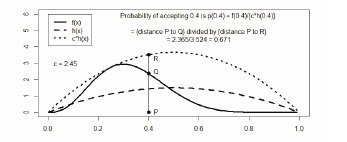

Figure.10 Illustration of the rejection sampling algorithm

# Notes on Rejection Sampling

**Note 1**: The rejection sampling algorithm as defined here also works with $ f(x) $ and $h(x) $ in the equations replaced by any kernels of the target and envelope distributions, respectively.

**Note 2**: The overall acceptance rate is the unconditional probability of acceptance and equals the area under $ f(x) $ divided by the area under $ c h(x) $, which is obviously $ \frac{1}{c} $ (approximately 0.409 in our example). The wastage may be defined as the overall probability of rejection, namely $ 1 - \frac{1}{c} $, and this is simply the area between $ f(x) $ and $ c h(x) $ (approximately 0.591 in our example).

**Note 3**: If we consider the experiment of proposing values repeatedly until the next acceptance, then the number of candidates follows a geometric distribution with parameter $ \frac{1}{c} $, and so the expected number of candidates (until acceptance) is $ \frac{1}{\left( \frac{1}{c} \right)} = c $.

**Note 4**: There are two basic principles which must be considered in rejection sampling:
- (i) The envelope density $ h(x) $ should be similar to the target density $ f(x) $ since this will minimise wastage, i.e., minimise the average number of proposals per acceptance, $ c $, and hence optimise the computer time required.
- (ii) The envelope distribution should be easy to sample from.

**Note 5**: The idea of rejection sampling can be used to give an intuitively appealing account of how Bayes’ theorem works. In this regard, see Smith and Gelfand (1992).

**Note 6**: How rejection sampling works can most easily be explained by considering the case where $ f(x) $ defines a simple discrete distribution. This is the subject of the next exercise.


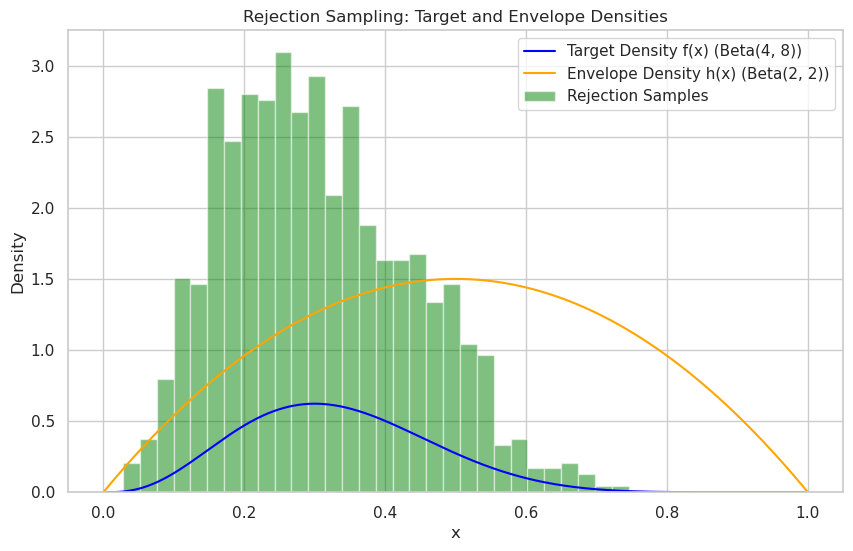

In [7]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target density function (Beta(4, 8))
def f(x):
    if 0 <= x <= 1:
        return (x**3 * (1-x)**7) * 280  # Beta(4, 8) density
    else:
        return 0

# Define the envelope density function (Beta(2, 2))
def h(x):
    if 0 <= x <= 1:
        return (x * (1 - x)) * 6  # Beta(2, 2) density
    else:
        return 0

# Rejection sampling function
def rejection_sampling(num_samples):
    samples = []
    epsilon = 1e-10  # Small value to prevent division by zero
    # Calculate c, filtering out values where h(x) is zero
    valid_x = [i / 1000 for i in range(1001) if h(i / 1000) > 0]
    c = max(f(x) / h(x) for x in valid_x) if valid_x else float('inf')  # Calculate c

    while len(samples) < num_samples:
        x_prime = random.uniform(0, 1)  # Sample from the envelope
        u = random.uniform(0, 1)  # Sample from U(0,1)
        p = f(x_prime) / (c * h(x_prime) + epsilon)  # Calculate acceptance probability
        if u < p:  # Accept or reject
            samples.append(x_prime)
    return samples

# Generate samples
num_samples = 1000
samples = rejection_sampling(num_samples)

# Plot the results
sns.set(style='whitegrid')

# Plotting the target density
x_values = [i / 1000 for i in range(1001)]
f_values = [f(x) for x in x_values]
h_values = [h(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label='Target Density f(x) (Beta(4, 8))', color='blue')
plt.plot(x_values, h_values, label='Envelope Density h(x) (Beta(2, 2))', color='orange')
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Rejection Samples', color='green')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling: Target and Envelope Densities')
plt.legend()
plt.show()


$$
\text{Exercise 5.13 Illustration of rejection sampling} 
$$

Consider the Binomial distribution $ \text{Bin}(2, \frac{1}{2}) $ with pdf:
$$
f(x) = 
\begin{cases} 
\frac{1}{4}, & x = 0, 2 \\ 
\frac{1}{2}, & x = 1 
\end{cases}
$$

Suppose we want to sample from this using rejection sampling with envelope $ g(x) = \frac{1}{3} $ for $ x = 0, 1, 2 $, i.e., the density of the discrete uniform distribution over the integers $ 0, 1, $ and $ 2 $. 

The rejection sampling algorithm can be analyzed as follows:

$$
c = \max \left( \frac{f(x)}{g(x)} \right)
$$

Calculating $ p(x) $:
$$
p(x) = \frac{f(x)}{c \cdot g(x)} = 
\begin{cases} 
\frac{1/4}{(3/2) \cdot (1/3)} = \frac{1/2}, & x = 0, 2 \\ 
\frac{1/2}{(3/2) \cdot (1/3)} = 1, & x = 1 
\end{cases}
$$

Now, suppose that we propose a very large number of proposed values from $g(x) $
- About $ \frac{1}{3} $ of these will be $ 0 $ of which about $\frac{1}{2} $will be accepted.
- About $ \frac{1}{3} $ of these will be $ 1 $, and all will be accepted.
- About $ \frac{1}{3} $ of these will be $ 2 $, of which about $ \frac{1}{2} $ will be accepted.

We see that about $ \frac{2}{3} $ of all proposed values will be accepted, and of these:
- $ 25\% $ will be $ 0 $
- $ 50\% $ will be $ 1 $
- $ 25\% $ will be $ 2 $

The overall acceptance rate is:
$$
\frac{1}{c} = \frac{1}{(3/2)} = \frac{2}{3}
$$

The wastage is:
$$
1 - \frac{1}{c} = \frac{1}{3}
$$

On average, $ c = 1.5 $ candidates will have to be proposed until an acceptance. Thus, generating $ 1,000 $ $ \text{Bin}(2, \frac{1}{2}) $ values will require about $ 1,500 $ candidates.


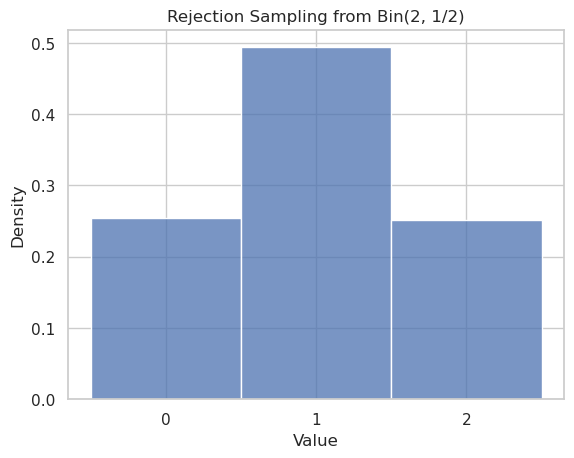

Estimated Probabilities: [0.255, 0.494, 0.251]


In [8]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target distribution f(x)
def f(x):
    if x == 0 or x == 2:
        return 1/4
    elif x == 1:
        return 1/2
    else:
        return 0

# Define the envelope distribution g(x)
def g(x):
    return 1/3

# Rejection sampling algorithm
def rejection_sampling(num_samples):
    samples = []
    c = 3 / 2  # The maximum value of f(x) / g(x)

    while len(samples) < num_samples:
        x_prime = random.choices([0, 1, 2], weights=[1/3, 1/3, 1/3])[0]  # Sample from g(x)
        acceptance_probability = f(x_prime) / (c * g(x_prime))

        u = random.uniform(0, 1)  # Sample from U(0, 1)

        # Accept or reject the sample
        if u < acceptance_probability:
            samples.append(x_prime)

    return samples

# Generate samples
num_samples = 1000
samples = rejection_sampling(num_samples)

# Plot the results
sns.histplot(samples, bins=[-0.5, 0.5, 1.5, 2.5], stat="density", kde=False)
plt.xticks([0, 1, 2])
plt.title("Rejection Sampling from Bin(2, 1/2)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# Display the estimated probabilities
estimated_probabilities = [samples.count(x) / num_samples for x in [0, 1, 2]]
print(f"Estimated Probabilities: {estimated_probabilities}")


# Rejection Sampling Example

We are considering a Binomial distribution $ \text{Bin}(2, 1/2) $ with the following probability mass function (pmf):

$$
f(x) =
\begin{cases} 
\frac{1}{4}, & x = 0 \\
\frac{1}{2}, & x = 1 \\
\frac{1}{4}, & x = 2
\end{cases}
$$

We use an envelope distribution $ g(x) $, which is a discrete uniform distribution over  ${0, 1, 2} $, with the pmf:

$$
g(x) = \frac{1}{3}, \quad x \in \{0, 1, 2\}
$$

### Step 1: Calculate the Constant $ c $

Rejection sampling requires the constant $ c $, which is the maximum ratio between the target distribution $ f(x) $ and the proposal distribution $ g(x) $. That is:

$$
c = \max_x \left( \frac{f(x)}{g(x)} \right)
$$

For each value of $ x $:

- $ x = 0 $: $ \frac{f(0)}{g(0)} = \frac{1}{4}{1/3} = \frac{3}{4} $
- $ x = 1 $: $ \frac{f(1)}{g(1)} = \frac{1}{2}{1/3} = \frac{3}{2} $
- $ x = 2 $: $ \frac{f(2)}{g(2)} = \frac{1}{4}{1/3} = \frac{3}{4} $

Thus, the maximum ratio is $ \frac{3}{2} $, so:

$$
c = \frac{3}{2}
$$

### Step 2: Acceptance Probabilities

The acceptance probabilities for each $ x $ are calculated as:

$$
\text{Acceptance probability} = \frac{f(x)}{c g(x)} = \frac{2}{3} f(x)
$$

For $ x = 0 $ and $ x = 2 $:

$$
\frac{2}{3} \cdot \frac{1}{4} = \frac{1}{6}
$$

For \( x = 1 \):

$$
\frac{2}{3} \cdot \frac{1}{2} = \frac{1}{3}
$$

### Step 3: Efficiency of Rejection Sampling

The overall acceptance rate is:

$$
\frac{1}{c} = \frac{1}{\frac{3}{2}} = \frac{2}{3}
$$

This means that about $ \frac{1}{3} $ of the proposed values will be rejected. On average, \( 1.5 \) candidates will need to be proposed to get one accepted value.
